# 결측치(na) 자료 평균 계산

In [1]:
data <- c(10,20,5,4,40,7,NA,6,3,NA,2,NA)

In [2]:
data

[1] 10 20  5  4 40  7 NA  6  3 NA  2 NA

In [3]:
# 평균
mean(data)

[1] NA

In [4]:
# NA 갯수 구하기
sum(is.na(data))
# false는 0 true는 1
table(is.na(data))

[1] 3


FALSE  TRUE 
    9     3 

In [5]:
# 결측치를 무조건 제거하면 통계량을 얻을 수 없으며 데이터의 손실로 문제가 발생한다.

In [6]:
# 결측치를 제거하고 평균구하기

mean(data, na.rm=T)

[1] 10.77778

In [7]:
# 1) NA를 0으로 대체
data_0 <- ifelse(is.na(data),0,data)
mean(data_0)

[1] 8.083333

In [8]:
# 2) NA를 평균으로 대체
data_mean <- ifelse(is.na(data),mean(data,na.rm=T),data)
mean(data_mean)

[1] 10.77778

In [9]:
# 3) NA를 중앙값으로 대체
data_median <- ifelse(is.na(data), median(data, na.rm=T),data)
mean(data_median)

[1] 9.583333

In [10]:
# 4) NA를 최대값으로 대체
data_max <- ifelse(is.na(data),max(data, na.rm=T),data)
mean(data_max)

[1] 18.08333

In [11]:
# 5) NA를 최소값으로 대체
data_min <- ifelse(is.na(data),min(data, na.rm=T),data)
mean(data_min)

[1] 8.583333

In [12]:
fna <- function(data){
    data_0 <- ifelse(is.na(data),0,data)
    cat("0으로 변환: ",mean(data_0),"\n")
    
    data_mean <- ifelse(is.na(data),mean(data,na.rm=T),data)
    mean(data_mean)
    cat("평균으로 변환: ",mean(data_mean),"\n")
    
    data_median <- ifelse(is.na(data), median(data, na.rm=T),data)
    mean(data_median)
    cat("중간값으로 변환: ",mean(data_median),"\n")
    
    data_max <- ifelse(is.na(data),max(data, na.rm=T),data)
    mean(data_max)
    cat("최대값으로 변환: ",mean(data_max),"\n")
    
    data_min <- ifelse(is.na(data),min(data, na.rm=T),data)
    mean(data_min)
    cat("최소값으로 변환: ",mean(data_min), "\n")
}

In [13]:
fna(data)

0으로 변환:  8.083333 
평균으로 변환:  10.77778 
중간값으로 변환:  9.583333 
최대값으로 변환:  18.08333 
최소값으로 변환:  8.583333 


# 몬테카를로 시뮬레이션 : data가 없을 경우

In [14]:
# 동전의 앞면, 뒷면 나올 확률

x <- runif(1)
if(x <= 1/2){
    result <- 0 # 앞면
}else{
    result <- 1 # 뒷면
}
result

[1] 1

In [15]:
coin <- function(n){
    count1 <- 0 # 앞면
    count2 <- 0 # 뒷면
    
    for(i in 1:n){
        if(runif(1)<=1/2){
            count1 <- count1+1
        }else{
            count2 <- count2+1
        }
    }
    cat("앞면 :", count1, "\n")
    cat("뒷면 :", count2, "\n")
    cat("----------------\n")
}

In [16]:
coin(10)
coin(100)
coin(1000)
coin(10000)
coin(100000)
coin(1000000)

앞면 : 6 
뒷면 : 4 
----------------
앞면 : 50 
뒷면 : 50 
----------------
앞면 : 514 
뒷면 : 486 
----------------
앞면 : 5029 
뒷면 : 4971 
----------------
앞면 : 49852 
뒷면 : 50148 
----------------
앞면 : 499826 
뒷면 : 500174 
----------------


In [17]:
# 가위, 바위, 보 시뮬레이션

rock <- function(n){
    count1 <- 0 # 가위 scissor
    count2 <- 0 # 바위 rock
    count3 <- 0 # 보 paper
    
    for(i in 1:n){
        # x<- trunc(runif(1)*3)+1
        # if(x==1) count1=count1+1
        # if(x==2) count2=count2+1
        # if(x==3) count3=count3+1
        x<-runif(1)
        if(x<=1/3){
            count1 <- count1+1
        }else if(x<=2/3){
            count2 <- count2+1
        }else{
            count3 <- count3+1
        # ---------------------위에 것으로 해야 함.
        }
    }
    cat("가위:\t",count1,"\n")
    cat("바위:\t",count2,"\n")
    cat("보:\t",count3,"\n")
    cat("----------------\n")
}

In [18]:
rock(10)
rock(100)
rock(1000)
rock(10000)
rock(100000)
rock(1000000)

가위:	 4 
바위:	 6 
보:	 0 
----------------
가위:	 30 
바위:	 32 
보:	 38 
----------------
가위:	 332 
바위:	 344 
보:	 324 
----------------
가위:	 3363 
바위:	 3345 
보:	 3292 
----------------
가위:	 33461 
바위:	 33305 
보:	 33234 
----------------
가위:	 333082 
바위:	 334203 
보:	 332715 
----------------


# 파일 입출력

In [19]:
# 벡터를 이용한 데이터프레임 만들기
no <- 1:4
name <- c("Apple","Banana","Peach","Berry")
price <- c(500,400,300,200)
qty <- c(5,4,3,2)

In [20]:
fruit <- data.frame(번호=no, 제품=name, 금액=price, 수량=qty)
fruit

번호,제품,금액,수량
1,Apple,500,5
2,Banana,400,4
3,Peach,300,3
4,Berry,200,2


In [21]:
# 현재 메모리에 있는 변수 보기
ls()

[1] "coin"        "data"        "data_0"      "data_max"    "data_mean"  
 [6] "data_median" "data_min"    "fna"         "fruit"       "name"       
[11] "no"          "price"       "qty"         "result"      "rock"       
[16] "x"

In [22]:
# 메모리 형태로 파일보관 
## 컴퓨터 용량 정리할 때 or 나만 봐야할 때 이용.
save(fruit, file="../Data/fruit.txt")

In [23]:
rm(fruit)

In [24]:
#fruit

In [25]:
# 메모리로 불러오기
load("../Data/fruit.txt")

In [26]:
fruit

번호,제품,금액,수량
1,Apple,500,5
2,Banana,400,4
3,Peach,300,3
4,Berry,200,2


In [27]:
# fruit를 csv로 저장하기
write.csv(fruit, "../Data/fruit.csv", row.names=F)

In [28]:
read.csv("../Data/fruit.csv")

번호,제품,금액,수량
1,Apple,500,5
2,Banana,400,4
3,Peach,300,3
4,Berry,200,2


# 세계 GDP순위 데이터 정제 및 차트 만들기

In [29]:
GDP_ranking <- read.csv("../Data/GDP.csv")
head(GDP_ranking, 10)

X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
,,NA,,,
,,NA,,(millions of,
,Ranking,NA,Economy,US dollars),
,,NA,,,
USA,1,NA,United States,"20,494,100",
CHN,2,NA,China,"13,608,152",
JPN,3,NA,Japan,"4,970,916",
DEU,4,NA,Germany,"3,996,759",
GBR,5,NA,United Kingdom,"2,825,208",
FRA,6,NA,France,"2,777,535",


In [30]:
# 1~4번째 줄 삭제
# 컬럼은 1,2,4,5만 발췌
## 필요 없는 것은 -로 빼고, 필요한 것은 작성
GDP_ranking2 <- GDP_ranking[-c(1:4),c(1,2,4,5)]
head(GDP_ranking2, 10)

,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [31]:
# 상위 14개국만 선별
GDP_ranking15 <- GDP_ranking2[1:15,]
GDP_ranking15

,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [32]:
# 컬럼 이름 변경하기
colnames(GDP_ranking15)<- c("Code","Ranking","Nation","GDP")
GDP_ranking15

,Code,Ranking,Nation,GDP
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [33]:
# Row이름 변경하기
rownames(GDP_ranking15)<-c()
tail(GDP_ranking15)

,Code,Ranking,Nation,GDP
10,CAN,10,Canada,"1,712,510"
11,RUS,11,Russian Federation,"1,657,554"
12,KOR,12,"Korea, Rep.","1,619,424"
13,AUS,13,Australia,"1,432,195"
14,ESP,14,Spain,"1,426,189"
15,MEX,15,Mexico,"1,223,809"


In [34]:
# 구조 확인
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 230 levels "","ABW","AFG",..: 216 38 103 52 72 68 94 100 28 34 ...
 $ Ranking: Factor w/ 212 levels "",".. Not available.  ",..: 3 114 131 142 153 164 175 186 197 4 ...
 $ Nation : Factor w/ 231 levels "","Afghanistan",..: 219 43 104 78 218 73 95 102 28 37 ...
 $ GDP    : Factor w/ 220 levels ""," .. "," 1,022 ",..: 78 44 137 113 77 75 74 67 20 19 ...


In [35]:
# factor 조정
GDP_ranking15$Code <- factor(GDP_ranking15$Code)

In [36]:
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 212 levels "",".. Not available.  ",..: 3 114 131 142 153 164 175 186 197 4 ...
 $ Nation : Factor w/ 231 levels "","Afghanistan",..: 219 43 104 78 218 73 95 102 28 37 ...
 $ GDP    : Factor w/ 220 levels ""," .. "," 1,022 ",..: 78 44 137 113 77 75 74 67 20 19 ...


In [37]:
# for문을 이용한 factor 조정

for(i in 2:ncol(GDP_ranking15)){
    GDP_ranking15[,i] <- factor(GDP_ranking15[,i])
}
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : Factor w/ 15 levels " 1,223,809 ",..: 13 8 15 14 12 11 10 9 7 6 ...


In [38]:
GDP_ranking15

Code,Ranking,Nation,GDP
USA,1,United States,"20,494,100"
CHN,2,China,"13,608,152"
JPN,3,Japan,"4,970,916"
DEU,4,Germany,"3,996,759"
GBR,5,United Kingdom,"2,825,208"
FRA,6,France,"2,777,535"
IND,7,India,"2,726,323"
ITA,8,Italy,"2,073,902"
BRA,9,Brazil,"1,868,626"
CAN,10,Canada,"1,712,510"


In [39]:
# GDP의 factor를 숫자로 변경하기
gdp <- GDP_ranking15$GDP
as.numeric(gdp) # factor에서 numeric으로 변경하면 X!!
as.character(gdp)

[1] 13  8 15 14 12 11 10  9  7  6  5  4  3  2  1

[1] " 20,494,100 " " 13,608,152 " " 4,970,916 "  " 3,996,759 "  " 2,825,208 " 
 [6] " 2,777,535 "  " 2,726,323 "  " 2,073,902 "  " 1,868,626 "  " 1,712,510 " 
[11] " 1,657,554 "  " 1,619,424 "  " 1,432,195 "  " 1,426,189 "  " 1,223,809 "

In [40]:
# stringr 사용해 숫자로 변환

library(stringr)


Attaching package: ‘stringr’

The following object is masked _by_ ‘.GlobalEnv’:

    fruit



In [41]:
num_gdp <- as.numeric(str_replace_all(gdp,",",""))

In [42]:
GDP_ranking15$GDP <- num_gdp
head(GDP_ranking15)

Code,Ranking,Nation,GDP
USA,1,United States,20494100
CHN,2,China,13608152
JPN,3,Japan,4970916
DEU,4,Germany,3996759
GBR,5,United Kingdom,2825208
FRA,6,France,2777535


In [43]:
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : num  20494100 13608152 4970916 3996759 2825208 ...


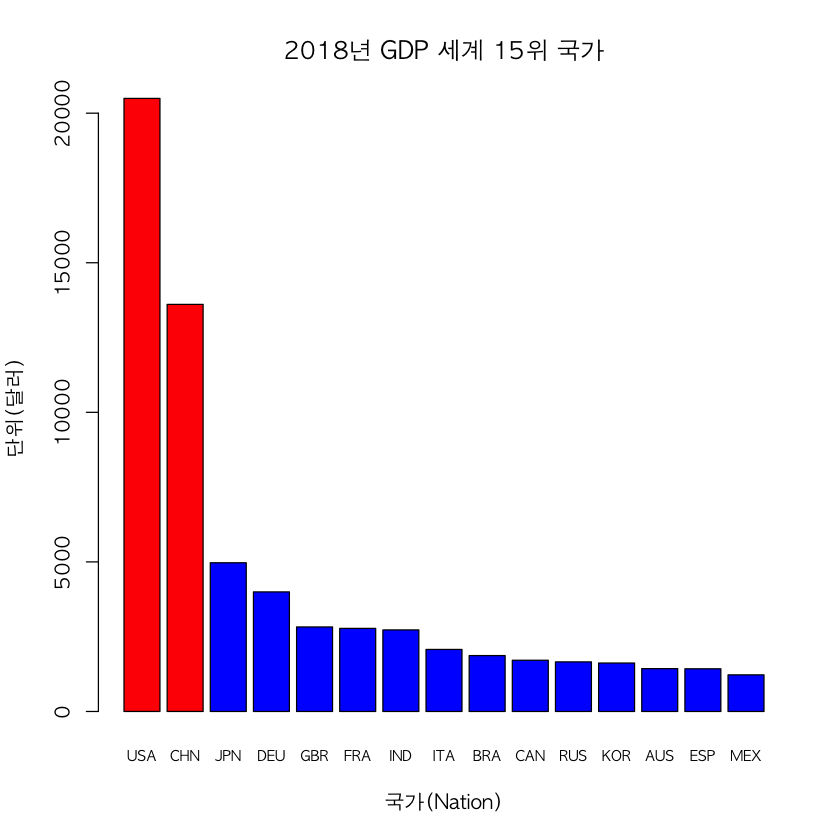

In [46]:
# for mac (window는 그냥 된다.) 
options(warn = -1) # 워링 메시지 지우는 방법임.
par(family = "AppleGothic")

# 막대그래프 시각화
barplot(GDP_ranking15$GDP / 1000, # GDP 상위 15개국
       #col = c("red","blue","green") #color
        #col = rainbow(nrow(GDP_ranking15)),
        
        col = c("red","red",rep("blue",13)),
        xlab = "국가(Nation)", # x축 이름
        ylab = "단위(달러)", # y축 이름
        main = "2018년 GDP 세계 15위 국가", # main title
        names = GDP_ranking15$Code,
        cex.names = 0.7
       )